Classification Report:
              precision    recall  f1-score   support

       False       0.88      1.00      0.93       255
        True       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

Confusion Matrix:
[[254   1]
 [ 35   4]]


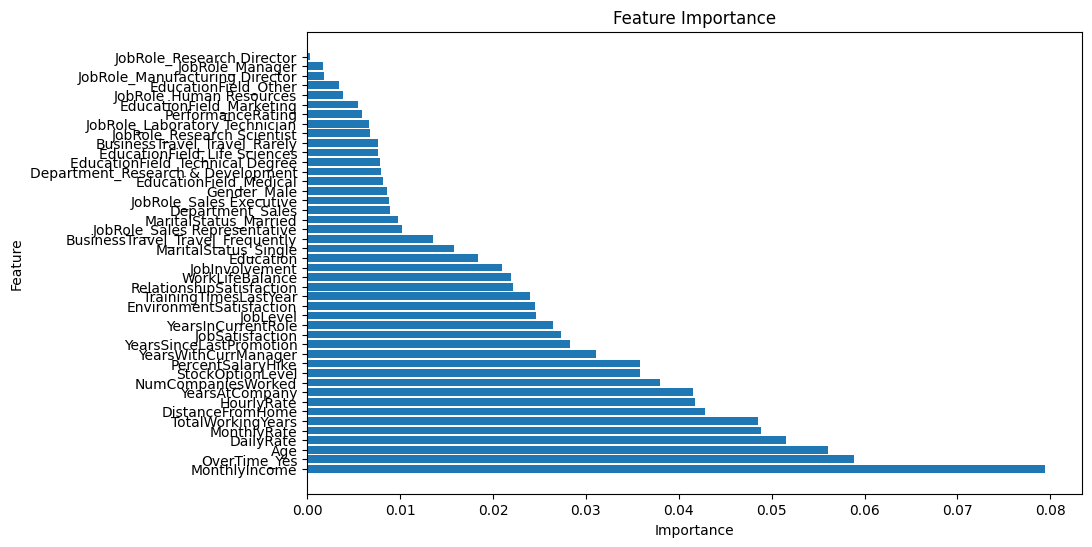

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel("/content/employee_data.xlsx")

# Data preprocessing
# Drop irrelevant columns
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, drop_first=True)

# Split data into features and target variable
X = data.drop('Attrition_Yes', axis=1)
y = data['Attrition_Yes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importance = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


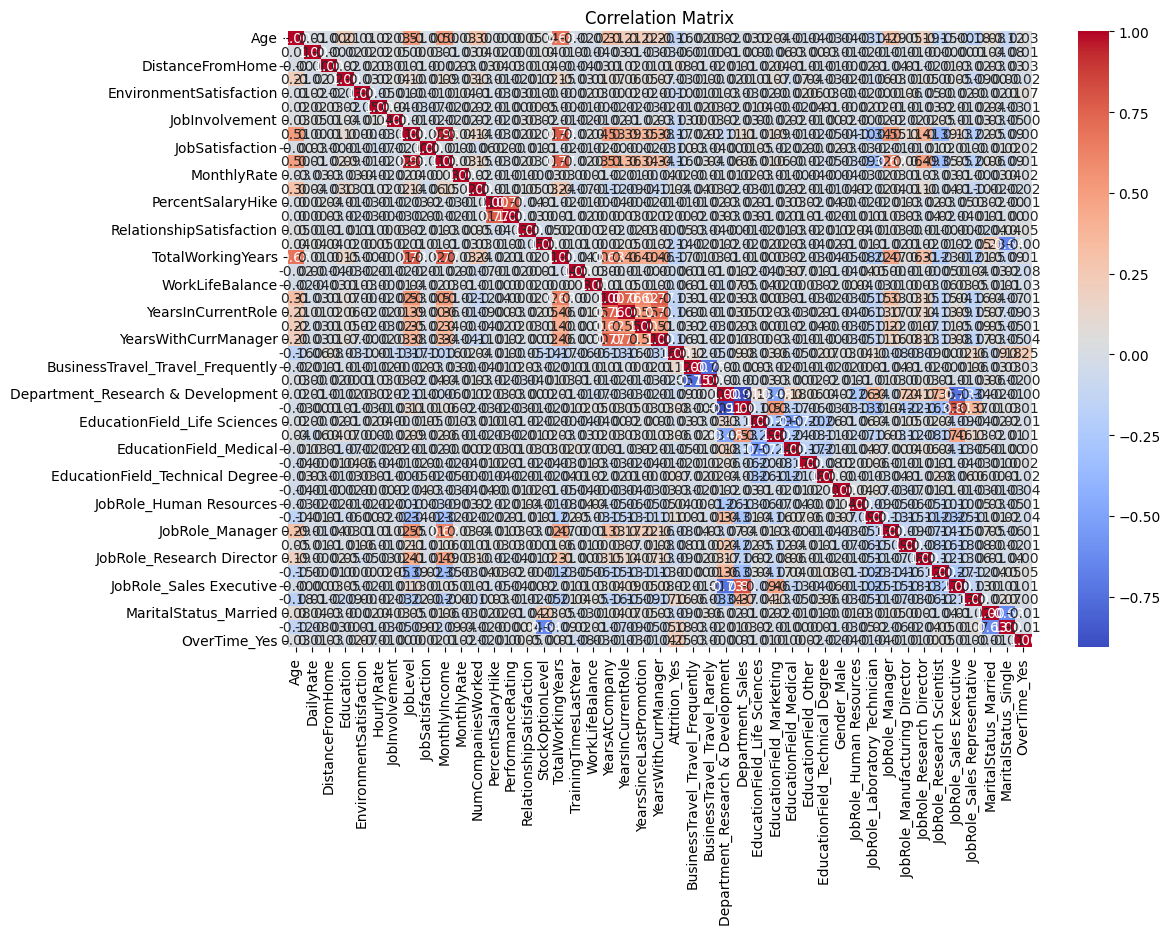

Correlation with Target Variable (Attrition_Yes):
Attrition_Yes                        1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
JobRole_Human Resources              0.036215
Gender_Male                          0.029453
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
PercentSalaryHike                   -0.013478
EducationField_Other                -0.017898
Education                     

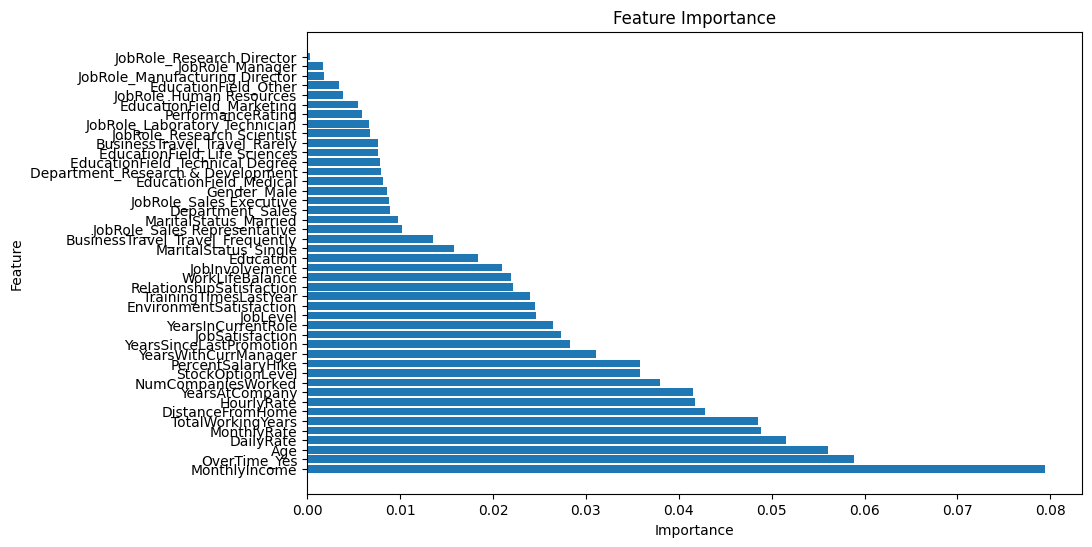

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel("/content/employee_data.xlsx")

# Data preprocessing
# Drop irrelevant columns
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, drop_first=True)

# Correlation Analysis
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Identify correlated features with the target variable
corr_with_target = corr_matrix['Attrition_Yes'].sort_values(ascending=False)
print("Correlation with Target Variable (Attrition_Yes):")
print(corr_with_target)

# Feature Engineering (if applicable)
# For example, you can create interaction terms between highly correlated features or derive new features based on domain knowledge.

# Split data into features and target variable
X = data.drop('Attrition_Yes', axis=1)
y = data['Attrition_Yes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importance = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Cross-Validation Accuracy: 0.858843537414966


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


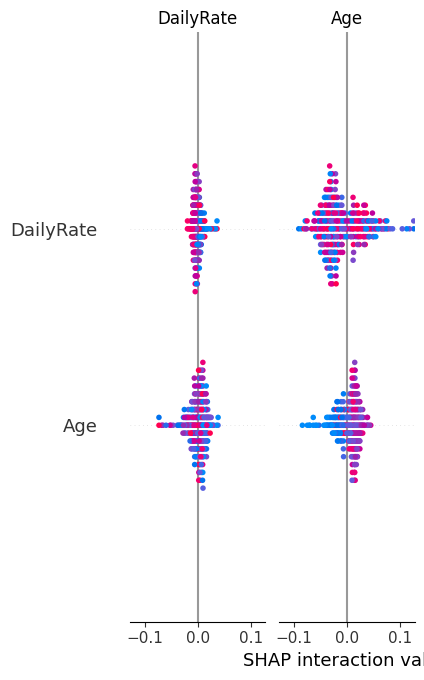

['outlier_detector.pkl']

In [ ]:
# Outlier Detection and Handling
from sklearn.ensemble import IsolationForest

# Identify and remove outliers
outlier_detector = IsolationForest(contamination=0.05)
outliers = outlier_detector.fit_predict(X_train)
X_train_no_outliers = X_train[outliers != -1]
y_train_no_outliers = y_train[outliers != -1]

# Cross-Validation Visualization
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

# Perform cross-validation
y_pred_cv = cross_val_predict(model, X_train, y_train, cv=5)
cv_accuracy = accuracy_score(y_train, y_pred_cv)
print("Cross-Validation Accuracy:", cv_accuracy)

# Ensemble Learning (Bagging)
from sklearn.ensemble import BaggingClassifier

# Create a bagging classifier
bagging_model = BaggingClassifier(base_estimator=model, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

# Model Interpretation (SHAP values)
import shap

# Explain model predictions using SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type='bar')

# Model Persistence
import joblib

# Save the trained model and preprocessing steps
joblib.dump(bagging_model, 'employee_attrition_bagging_model.pkl')
joblib.dump(outlier_detector, 'outlier_detector.pkl')


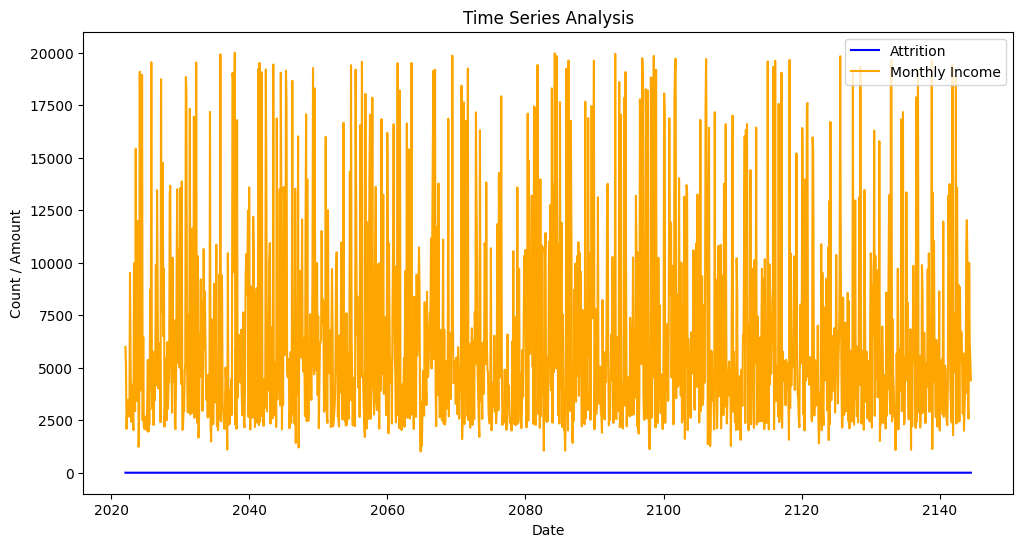

In [ ]:
# Time Series Analysis and Line Graphs
# Create a synthetic time series using the index of the DataFrame
data['Date'] = pd.date_range(start='2022-01-01', periods=len(data), freq='M')
data.set_index('Date', inplace=True)

# Extract relevant columns for time series analysis
time_series_data = data[['Attrition_Yes', 'MonthlyIncome']]

# Plot time series for Attrition and MonthlyIncome
plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data['Attrition_Yes'], label='Attrition', color='blue')
plt.plot(time_series_data.index, time_series_data['MonthlyIncome'], label='Monthly Income', color='orange')
plt.title('Time Series Analysis')
plt.xlabel('Date')
plt.ylabel('Count / Amount')
plt.legend()
plt.show()


Classification Report with Scaled Data:
              precision    recall  f1-score   support

       False       0.88      1.00      0.93       255
        True       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

Confusion Matrix with Scaled Data:
[[254   1]
 [ 35   4]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


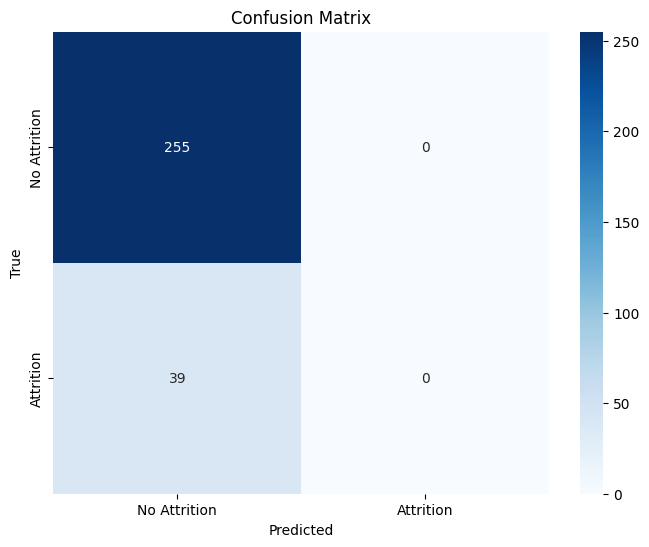

Classification Report with Pipeline:
              precision    recall  f1-score   support

       False       0.87      0.96      0.91       255
        True       0.27      0.10      0.15        39

    accuracy                           0.84       294
   macro avg       0.57      0.53      0.53       294
weighted avg       0.79      0.84      0.81       294



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
              precision    recall  f1-score   support

       False       0.88      0.98      0.93       255
        True       0.60      0.15      0.24        39

    accuracy                           0.87       294
   macro avg       0.74      0.57      0.59       294
weighted avg       0.85      0.87      0.84       294



Classification Report with Scaled Data:
              precision    recall  f1-score   support

       False       0.88      1.00      0.93       255
        True       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

Confusion Matrix with Scaled Data:
[[254   1]
 [ 35   4]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


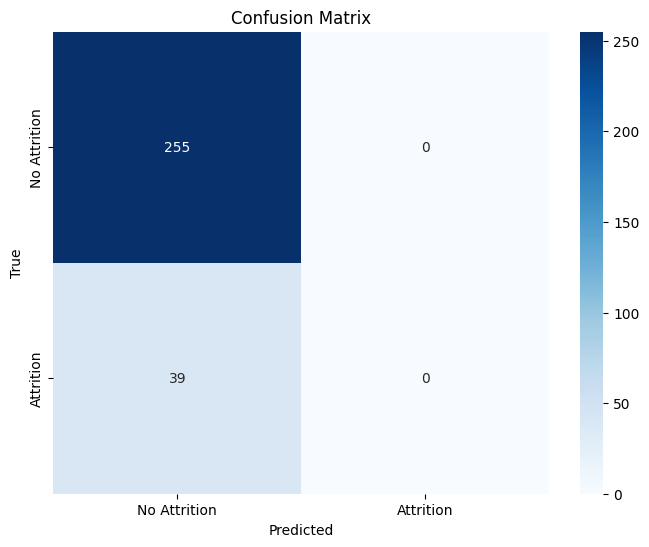

Classification Report with Pipeline:
              precision    recall  f1-score   support

       False       0.88      0.98      0.92       255
        True       0.40      0.10      0.16        39

    accuracy                           0.86       294
   macro avg       0.64      0.54      0.54       294
weighted avg       0.81      0.86      0.82       294



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
              precision    recall  f1-score   support

       False       0.88      0.98      0.93       255
        True       0.60      0.15      0.24        39

    accuracy                           0.87       294
   macro avg       0.74      0.57      0.59       294
weighted avg       0.85      0.87      0.84       294



In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import joblib

# Load the data
data = pd.read_excel("/content/employee_data.xlsx")

# Data preprocessing
# Drop irrelevant columns
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, drop_first=True)

# Split data into features and target variable
X = data.drop('Attrition_Yes', axis=1)
y = data['Attrition_Yes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training with scaled data
model_scaled = RandomForestClassifier(n_estimators=100, random_state=42)
model_scaled.fit(X_train_scaled, y_train)

# Model evaluation with scaled data
y_pred_scaled = model_scaled.predict(X_test_scaled)
print("Classification Report with Scaled Data:")
print(classification_report(y_test, y_pred_scaled))
print("Confusion Matrix with Scaled Data:")
print(confusion_matrix(y_test, y_pred_scaled))

# Model Calibration
calibrated_model = CalibratedClassifierCV(model_scaled, method='sigmoid', cv='prefit')
calibrated_model.fit(X_train, y_train)

# Error Analysis (Plot confusion matrix)
cm = confusion_matrix(y_test, calibrated_model.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Pipeline Implementation
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])
pipeline.fit(X_train, y_train)
y_pred_pipeline = pipeline.predict(X_test)
print("Classification Report with Pipeline:")
print(classification_report(y_test, y_pred_pipeline))

# Model Selection
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(kernel='linear', random_state=42)

for clf in [logistic_regression, svm]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Model: {clf.__class__.__name__}")
    print(classification_report(y_test, y_pred))

# Model Evaluation Metrics (ROC Curve and Precision-Recall Curve)
fpr, tpr, _ = roc_curve(y_test, calibrated_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

precision, recall, _ = precision_recall_curve(y_test, calibrated_model.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Model Interpretability (SHAP values)
explainer = shap.Explainer(calibrated_model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

# Model Fine-Tuning (GridSearchCV)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=2,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)

# Ensemble Learning (Voting Classifier)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(kernel='linear', random_state=42)

voting_clf = VotingClassifier(estimators=[('rf', rf), ('lr', lr), ('svm', svm)], voting='soft')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
print("Classification Report with Voting Classifier:")
print(classification_report(y_test, y_pred_voting))

# Model Deployment
joblib.dump(voting_clf, 'final_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
